# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [8]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [9]:
class Node:
    """
    A node in the Left-Leaning Red-Black Tree.
    """
    def __init__(self, key, color=True):
        """
        Initialises a new node.
        
        Args:
            key: The value to be stored in the node.
            color: The color of the node (True for RED, False for BLACK). Defaults to RED.
        """
        self.key = key
        self.color = color
        self.left = None
        self.right = None

class LLRBBST:
    """
    An implementation of a Left-Leaning Red-Black Binary Search Tree.
    This is a type of self-balancing binary search tree.
    """
    def __init__(self):
        """
        Initialises the LLRB Tree.
        """
        self.root = None
        self.io_operations = 0

    def read_node(self, node):
        """
        Simulates a node read operation and increments the I/O counter.
        
        Args:
            node: The node being read.
        """
        self.io_operations += 1

    def write_node(self, node):
        """
        Simulates a node write operation and increments the I/O counter.
        
        Args:
            node: The node being written.
        """
        self.io_operations += 1

    def isRed(self, node):
        """
        Checks if a given node is RED. A null node is considered BLACK.
        
        Args:
            node: The node to check.
            
        Returns:
            bool: True if the node is not None and is RED, False otherwise.
        """
        return node is not None and node.color

    def rotateLeft(self, h):
        """
        Performs a left rotation on a given node `h` to fix a right-leaning red link.
        
        Args:
            h: The node at the root of the subtree to be rotated.
            
        Returns:
            Node: The new root of the rotated subtree.
        """
        x = h.right
        h.right = x.left
        x.left = h
        x.color = h.color
        h.color = True # The new link to h is now red
        self.write_node(x)
        self.write_node(h)
        return x

    def rotateRight(self, h):
        """
        Performs a right rotation on a given node `h` to fix two consecutive left red links.
        
        Args:
            h: The node at the root of the subtree to be rotated.
            
        Returns:
            Node: The new root of the rotated subtree.
        """
        x = h.left
        h.left = x.right
        x.right = h
        x.color = h.color
        h.color = True # The new link to h is now red
        self.write_node(x)
        self.write_node(h)
        return x

    def flipColors(self, h):
        """
        Flips the colors of a node `h` and its two children.
        This is used to break up a temporary 4-node.
        
        Args:
            h: The parent node whose colors (and its children's) will be flipped.
        """
        h.color = True
        h.left.color = False
        h.right.color = False
        self.write_node(h)
        self.write_node(h.left)
        self.write_node(h.right)

    def insertElement(self, key):
        """
        Public method to insert a key into the LLRB tree.
        
        Args:
            key: The key to insert.
            
        Returns:
            bool: True if the key was inserted, False if it already existed.
        """
        inserted, self.root = self._insert(self.root, key)
        self.root.color = False  # The root of the tree must always be BLACK.
        return inserted

    def _insert(self, node, key):
        """
        Private recursive helper to insert a key and maintain LLRB properties.
        
        Args:
            node: The current node in the recursive traversal.
            key: The key to insert.
            
        Returns:
            tuple: (bool, Node) A boolean indicating if insertion occurred, and the
                   (potentially new) root of the current subtree.
        """
        if node is None:
            new_node = Node(key)
            self.write_node(new_node)
            return True, new_node  # New nodes are always RED by default
        
        self.read_node(node)
        if key == node.key:
            return False, node
        
        if key < node.key:
            inserted, node.left = self._insert(node.left, key)
        else:
            inserted, node.right = self._insert(node.right, key)

        # Fix LLRB properties on the way back up the recursion
        if self.isRed(node.right) and not self.isRed(node.left):
            node = self.rotateLeft(node)
        if self.isRed(node.left) and self.isRed(node.left.left):
            node = self.rotateRight(node)
        if self.isRed(node.left) and self.isRed(node.right):
            self.flipColors(node)
        
        return inserted, node
    
    def searchElement(self, key):
        """
        Public method to search for a key in the tree.
        
        Args:
            key: The key to search for.
            
        Returns:
            bool: True if the key is found, False otherwise.
        """
        return self._search(self.root, key)

    def _search(self, node, key):
        """
        Private iterative helper to search for a key.
        
        Args:
            node: The node to start the search from.
            key: The key to search for.
            
        Returns:
            bool: True if the key is found, False otherwise.
        """
        while node:
            self.read_node(node)
            if key < node.key:
                node = node.left
            elif key > node.key:
                node = node.right
            else:
                return True
        return False
    
    def inOrderTraversal(self):
        """
        Returns a list of all keys in the tree in ascending order.
        Useful for verifying tree contents.
        
        Returns:
            list: A sorted list of the keys in the tree.
        """
        result = []
        self._inOrderTraversal(self.root, result)
        return result

    def _inOrderTraversal(self, node, result):
        """
        Private recursive helper for performing an in-order traversal.
        
        Args:
            node: The current node in the traversal.
            result: The list to which keys are appended.
        """
        if node:
            self._inOrderTraversal(node.left, result)
            result.append(node.key)
            self._inOrderTraversal(node.right, result)

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [10]:
class BTree:
    """
    An implementation of a B-Tree, a self-balancing tree data structure
    that maintains sorted data and allows searches, sequential access,
    insertions, and deletions in logarithmic time.
    """
    class Node:
        """
        A node in the B-Tree.
        """
        def __init__(self):
            """
            Initialises a new B-Tree node.
            """
            self.keys = []
            self.pointers = None # Will be a list of nodes if not a leaf

    def __init__(self, bf=20):
        """
        Initialises the B-Tree.
        
        Args:
            bf: The branching factor (t) of the tree. Each node must have at least t-1 keys
                and at most 2t-1 keys, except for the root.
        """
        if bf <= 1:
            raise ValueError("Could not create tree: Invalid branching factor specified")
        self.t = bf  # Branching factor
        self.root = self.Node()
        self.io_operations = 0

    def read(self, node):
        """
        Simulates a node read operation and increments the I/O counter.
        
        Args:
            node: The node being read.
        """
        self.io_operations += 1 
    
    def write(self, node):
        """
        Simulates a node write operation and increments the I/O counter.
        
        Args:
            node: The node being written.
        """
        self.io_operations += 1

    def split_child(self, parent, i):
        """
        Splits a full child node of a given parent node.
        The child at parent.pointers[i] is split, and its median key is moved
        up to the parent.
        
        Args:
            parent: The parent of the child node to be split.
            i: The index of the child in the parent's pointer list.
        """
        if parent.pointers is None:
            raise ValueError("Could not perform split child action: designated parent does not have a child")
        
        child_to_split = parent.pointers[i]
        if len(child_to_split.keys) != 2 * self.t - 1:
            raise ValueError("Could not perform split child action: child node is not full")

        # Allocate a new node to become the right sibling
        right_sibling = self.Node()
        
        median_index = self.t - 1
        median_element = child_to_split.keys[median_index]

        # Copy keys to the right of the median to the new right sibling
        right_sibling.keys = child_to_split.keys[median_index + 1:]
        
        # If the split node is not a leaf, copy its pointers as well
        if child_to_split.pointers is not None:
            right_sibling.pointers = child_to_split.pointers[median_index + 1:]

        # Shrink the original child node (now the left sibling)
        del child_to_split.keys[median_index:]
        if child_to_split.pointers is not None:
            del child_to_split.pointers[median_index + 1:]

        # Push the median element up to the parent
        parent.keys.insert(i, median_element)
        parent.pointers.insert(i + 1, right_sibling)

        # Simulate writing the modified nodes
        self.write(parent)
        self.write(child_to_split)
        self.write(right_sibling)

    def insertElement(self, element):
        """
        Inserts an element into the B-Tree, handling root splits if necessary.
        
        Args:
            element: The element to insert.
            
        Returns:
            bool: True if insertion was successful, False if the element already exists.
        """
        original_root = self.root
        # If the root is full, it must be split before insertion can proceed.
        if len(original_root.keys) == 2 * self.t - 1:
            new_root = self.Node()
            self.root = new_root
            new_root.pointers = [original_root]
            self.split_child(new_root, 0)
            return self.insert_helper(new_root, element)
        else:
            return self.insert_helper(original_root, element)

    def insert_helper(self, node, element):
        """
        A recursive helper to find the correct position and insert an element.
        This function assumes the current node is not full.
        
        Args:
            node: The current node in the traversal (assumed not full).
            element: The element to insert.
            
        Returns:
            bool: True for a successful insertion, False if the element already exists.
        """
        i = len(node.keys) - 1
        # If the current node is a leaf, insert the element here.
        if node.pointers is None:
            while i >= 0 and element < node.keys[i]:
                i -= 1
            
            # Check for duplicates before inserting
            if i >= 0 and node.keys[i] == element:
                return False

            node.keys.insert(i + 1, element)
            self.write(node)
            return True
        # If the node is not a leaf, find the correct child to traverse down to.
        else:
            while i >= 0 and element < node.keys[i]:
                i -= 1
            
            # Check for duplicates in internal nodes
            if i >= 0 and node.keys[i] == element:
                return False

            i += 1
            self.read(node.pointers[i])
            # If the child we are about to descend to is full, split it first.
            if len(node.pointers[i].keys) == 2 * self.t - 1:
                self.split_child(node, i)
                # After split, determine which of the two new children to descend into.
                if element > node.keys[i]:
                    i += 1
            return self.insert_helper(node.pointers[i], element)

    def searchElement(self, element, node=None):
        """
        Searches for an element within the B-Tree.
        
        Args:
            element: The element to search for.
            node: The node to start the search from (defaults to the root).
            
        Returns:
            bool: True if the element is found, False otherwise.
        """
        if node is None:
            node = self.root
        
        i = 0
        # Find the first key in the node that is greater than or equal to the element.
        while i < len(node.keys) and element > node.keys[i]:
            i += 1
        
        # If the key is found at the current position, return True.
        if i < len(node.keys) and element == node.keys[i]:
            return True
        # If the node is a leaf and the key was not found, the search fails.
        elif node.pointers is None:
            return False
        # Otherwise, recurse into the appropriate child.
        else:
            self.read(node.pointers[i])
            return self.searchElement(element, node.pointers[i])

Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [11]:
import math

class SGNode():
    """
    A node in the Scapegoat Tree.
    """
    def __init__(self, value):
        """
        Initialises a new node.
        
        Args:
            value: The value to be stored in the node.
        """
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        
class ScapegoatTree(AbstractSearchInterface):
    """
    An implementation of a Scapegoat Tree, a self-balancing binary search tree.
    """
    def __init__(self, alpha = 0.7):
        """
        Initialises the Scapegoat Tree.
        
        Args:
            alpha: The balance factor, typically between 0.5 and 1.0.
        """
        self.root = None
        self.alpha = alpha
        self.n = 0 # Total number of nodes in the tree
        self.io_operations = 0 # Counter for simulated I/O operations
    
    def read_node(self, node):
        """
        Simulates a node read operation and increments the I/O counter.
        
        Args:
            node: The node being read.
        """
        self.io_operations += 1
    
    def write_node(self, node):
        """
        Simulates a node write operation and increments the I/O counter.
        
        Args:
            node: The node being written.
        """
        self.io_operations += 1

    def size(self, node):
        """
        Calculates the size (number of nodes) of the subtree rooted at a given node.
        
        Args:
            node: The root node of the subtree.
            
        Returns:
            int: The total number of nodes in the subtree.
        """
        count = 0
        stack = [node]
        while stack:
            curr = stack.pop()
            if curr is not None:
                self.read_node(curr)
                count += 1
                stack.append(curr.left)
                stack.append(curr.right)
        return count

    def findDepth(self, node):
        """
        Calculates the depth of a node (its distance from the root).
        
        Args:
            node: The node whose depth is to be calculated.
            
        Returns:
            int: The depth of the node.
        """
        depth = 0
        current_node = node
        while current_node != self.root:
            depth += 1
            current_node = current_node.parent
        return depth
    
    def tooDeep(self, depth):
        """
        Checks if a given depth exceeds the tree's alpha-based height limit.
        
        Args:
            depth: The depth of the newly inserted node.
            
        Returns:
            bool: True if the depth is excessive, False otherwise.
        """
        # A node is too deep if its depth exceeds log(1/alpha) of n
        return depth > math.log(self.n, 1/self.alpha)
    
    def isScapeGoat(self, node):
        """
        Determines if the PARENT of a given node qualifies as a scapegoat.
        A parent is a scapegoat if the size of its child's subtree is too large
        relative to its own size, violating the alpha-weight balance property.
        
        Args:
            node: The child node whose parent is being evaluated.
            
        Returns:
            bool: True if the parent of the node is a scapegoat, False otherwise.
        """
        if node.parent is None:
            return False
            
        parent_size = self.size(node.parent)
        node_size = self.size(node)
        
        # Check if size(node) > alpha * size(node.parent)
        return parent_size > self.alpha * node_size
        
    def getScapegoat(self, node):
        """
        Finds the highest ancestor of a node that qualifies as a scapegoat.
        It traverses up the tree from the given node.
        
        Args:
            node: The node that was inserted too deep, triggering the search.
            
        Returns:
            SGNode: The identified scapegoat node, which is the root of the
                    subtree that needs rebalancing.
        """
        current = node
        # Traverse upwards until a scapegoat is found or the root is reached
        while current.parent is not None and not self.isScapeGoat(current):
            current = current.parent
        return current.parent
    
    def inOrderTraversal(self, node):
        """
        Performs an iterative in-order traversal to collect all node values in a subtree.
        
        Args:
            node: The root node of the subtree to traverse.
            
        Returns:
            list: A sorted list of the values in the subtree.
        """
        if node is None:
            return []

        elements = []
        stack = []
        current = node

        while current is not None or stack:
            # Go to the leftmost node
            if current is not None:
                stack.append(current)
                self.read_node(current)
                current = current.left
            # Backtrack from the empty subtree and visit the node
            else:
                current = stack.pop()
                elements.append(current.value)
                current = current.right # Visit the right subtree

        return elements

    def rebalance(self, scapegoat):
        """
        Rebalances the subtree rooted at the given scapegoat node.
        
        Args:
            scapegoat: The node at the root of the subtree to be rebalanced.
        """
        # Get all node values in the subtree in sorted order
        nodes = self.inOrderTraversal(scapegoat)
        
        parent = scapegoat.parent
        is_left_child = parent is not None and parent.left == scapegoat
        
        # Helper function to build a balanced BST from sorted elements
        def buildBalancedBST(elements, start, end):
            if start > end:
                return None
            
            mid = (start + end) // 2
            node = SGNode(elements[mid])
            
            # Recursively build left and right subtrees
            node.left = buildBalancedBST(elements, start, mid - 1)
            if node.left is not None:
                node.left.parent = node
                
            node.right = buildBalancedBST(elements, mid + 1, end)
            if node.right is not None:
                node.right.parent = node
            
            self.write_node(node)
            return node
        
        # Build the new balanced subtree
        balanced_subtree = buildBalancedBST(nodes, 0, len(nodes) - 1)
        
        # Connect the new subtree back to the original tree
        if parent is None:
            self.root = balanced_subtree
            if balanced_subtree is not None:
                balanced_subtree.parent = None
            self.write_node(self.root)
        else:
            if is_left_child:
                parent.left = balanced_subtree
            else:
                parent.right = balanced_subtree
            
            self.write_node(parent)
            
            if balanced_subtree is not None:
                balanced_subtree.parent = parent
                self.write_node(balanced_subtree)

    def insertElement(self, element):
        """
        Inserts an element into the tree, then checks for and corrects imbalance.
        
        Args:
            element: The value to insert into the tree.
            
        Returns:
            bool: True if insertion was successful, False if the element already exists.
        """
        new_node = SGNode(element)
        self.n += 1

        if self.root is None:
            self.root = new_node 
            return True

        # Standard BST insertion
        parent_candidate = None
        current_node = self.root
        self.read_node(self.root)

        while current_node is not None:
            parent_candidate = current_node
            if new_node.value < current_node.value:
                next_node = current_node.left
            elif new_node.value > current_node.value:
                next_node = current_node.right
            else:
                self.n -= 1 # Decrement count as insertion failed
                return False
            
            if next_node is not None:
                self.read_node(next_node)
            current_node = next_node
                
        new_node.parent = parent_candidate
    
        if new_node.value < parent_candidate.value:
            parent_candidate.left = new_node
        else:
            parent_candidate.right = new_node
        
        self.write_node(new_node)
        self.write_node(parent_candidate)
                   
        # Check for imbalance and rebalance if necessary
        depth = self.findDepth(new_node)
        if self.tooDeep(depth):
            scapegoat = self.getScapegoat(new_node)
            if scapegoat is not None:
                self.rebalance(scapegoat)
        
        return True
    
    def searchElement(self, element):     
        """
        Searches for an element in the tree using a standard BST search.
        
        Args:
            element: The value to search for.
            
        Returns:
            bool: True if the element is found, False otherwise.
        """
        current = self.root
        
        while current is not None:
            self.read_node(current)
            if element == current.value:
                return True
            elif element < current.value:
                current = current.left
            else:
                current = current.right
        
        return False

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [12]:
import string
import random

class TestDataGenerator():
    """
    A class for generating various types of test data for experiments.
    """
    def __init__(self, seed=None):
        """
        Initialises the data generator.
        
        Args:
            seed: An optional integer seed for the random number generator
                  to ensure reproducibility.
        """
        if seed is not None:
            random.seed(seed)
        self.seed = seed
    
    def generateString(self, length):
        """
        Generates a single random alphanumeric string.
        
        Args:
            length: The desired length of the string.
            
        Returns:
            str: The generated random string.
        """
        randomString = ''.join(random.choices(string.ascii_letters + string.digits, k=length))
        return randomString
    
    def generateStrings(self, n, length=5):
        """
        Generates a list of unique random alphanumeric strings.
        
        Args:
            n: The number of unique strings to generate.
            length: The length of each individual string.
            
        Returns:
            list: A list of unique random strings.
        """
        # Generate unique strings to avoid duplicates
        unique_strings = set()
        while len(unique_strings) < n:
            unique_strings.add(''.join(random.choices(string.ascii_letters + string.digits, k=length)))
        return list(unique_strings)
    
    def balancedSamples(self, n):
        """
        Generates samples arranged to create a balanced tree upon sequential insertion.
        This is achieved by arranging samples in a median-first order.
        
        Args:
            n: The number of samples to generate.
            
        Returns:
            list: A list of strings arranged in a balanced insertion order.
        """
        # Generate sorted values
        values = sorted(self.generateStrings(n))
        result = []
        
        # Helper function to add values in a median-first order
        def addMedianFirst(arr, start, end):
            if start > end:
                return
            mid = (start + end) // 2
            result.append(arr[mid])
            addMedianFirst(arr, start, mid - 1)
            addMedianFirst(arr, mid + 1, end)
        
        addMedianFirst(values, 0, len(values) - 1)
        
        return result[:n]

    def sortedSamples(self, n):
        """
        Generates a list of samples in sorted (ascending) order.
        This represents a worst-case scenario for unbalanced tree structures.
        
        Args:
            n: The number of samples to generate.
            
        Returns:
            list: A list of sorted strings.
        """
        values = sorted(self.generateStrings(n))
        return values

    def unbalancedSamples(self, n):
        """
        Generates a list of samples arranged to create a moderately unbalanced tree.
        
        Args:
            n: The number of samples to generate.
            
        Returns:
            list: A list of strings in a predetermined unbalanced order.
        """
        # Generate more samples than needed to ensure pattern can be fulfilled
        extra = int(n * 1.4)
        values = self.generateStrings(extra)
        sortedValues = sorted(values)
        
        # Create the unbalanced pattern by combining slices with increasing step sizes
        result = sortedValues[:1] + sortedValues[1::2] + sortedValues[2::4] + sortedValues[4::8] + sortedValues[8::16]
        
        # Return exactly n elements
        return result[:n]

    def randomSamples(self, n):
        """
        Generates a list of randomly shuffled samples.
        This represents an average-case scenario for tree structures.
        
        Args:
            n: The number of samples to generate.
            
        Returns:
            list: A list of randomly shuffled strings.
        """
        values = self.generateStrings(n)
        random.shuffle(values)
        return values
    
    def caseRouter(self, case, n):
        """
        Routes to the appropriate sample generation method based on a string name.
        
        Args:
            case: The name of the case ("Balanced", "Sorted", "Unbalanced", "Random").
            n: The number of samples to generate for the chosen case.
            
        Returns:
            list: The generated list of samples, or an empty list if the case is not recognized.
        """
        match case:
            case "Balanced":
                return self.balancedSamples(n)
            case "Sorted":
                return self.sortedSamples(n)
            case "Unbalanced":
                return self.unbalancedSamples(n)
            case "Random":
                return self.randomSamples(n)
            case _:
                print("Case not recognized. Returning an empty list.")
                return []

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

In [13]:
import timeit
import matplotlib
import matplotlib.pyplot

colourList = [
            'royalblue',
            'firebrick',
            'forestgreen',
            'darkorange',
            'rebeccapurple',
            'teal',
            'gold',
            'crimson',
            'mediumseagreen',
            'darkslateblue'
        ]

class ExperimentalFramework():
    """
    A framework for conducting performance experiments on data structures.
    This class allows measuring insertion and search operations performance
    across different data structure implementations.
    """
    
    #+++++++++++++++++++++++++++++++
    #+ 1. INITIALISATION & SETUP   +
    #+++++++++++++++++++++++++++++++
    
    def __init__(self, nExponent, dataStructureClass = None, *args, **kwargs):
        """
        Initialise the experimental framework.
        
        Args:
            nExponent: Exponent to determine sample size (sample size = base^nExponent)
            dataStructureClass: The class of the data structure to test
            *args: Positional arguments to pass to the data structure constructor
            **kwargs: Keyword arguments to pass to the data structure constructor
        """
        self.dsClass = dataStructureClass
        self.args = args
        self.kwargs = kwargs
        self.dataStructure = None

        self.dataGenerator = TestDataGenerator()
        self.samples = []
        self.sortedSamples = []
        self.randomSamples = []
        self.balancedSamples = []
        self.unbalancedSamples = []

        self.nExponent = nExponent
        self.sampleSize = 0
    
    def generateSamples(self):
        """
        Generates test samples for best, average, and worst cases.
        
        Args:
            sgTree: If True, generate worst case for Scapegoat trees;
                   otherwise for LLRB/AVL trees
        """
        self.randomSamples = self.dataGenerator.randomSamples(self.sampleSize)
        self.balancedSamples = self.dataGenerator.balancedSamples(self.sampleSize)
        self.unbalancedSamples = self.dataGenerator.unbalancedSamples(self.sampleSize)
        self.sortedSamples = self.dataGenerator.sortedSamples(self.sampleSize)
    
    def insertAll(self):
        """
        Fills the data structure with all elements from the samples list.
        Used to prepare the data structure before running search tests.
        """
        for sample in self.samples:
            self.dataStructure.insertElement(sample)

    def classToString(self, className):
        """ 
        Coverts a class string name to a string with just the name of the class
        """
        return className[17:-2]
            
    #+++++++++++++++++++++++++++++++
    #+ 2. DATA COLLECTION          +
    #+++++++++++++++++++++++++++++++
            
    def measureInserts(self, samples=None):
        """
        Measures time cost for each insert operation.
        
        Args:
            samples: List of elements to insert. If None, uses self.samples
            
        Returns:
            tuple: (N, time) where N is operation count and time is execution time
        """
        if samples is None:
            samples = self.samples

        # Create a fresh data structure instance
        self.dataStructure = self.dsClass(*self.args, **self.kwargs)
        N, time, io = [], [], []

        # Measure each insert operation
        for i, sample in enumerate(samples):
            N.append(i + 1)  # 1-indexed for operation number
            
            self.dataStructure.io_operations = 0
            executionTime = timeit.timeit(lambda s=sample: self.dataStructure.insertElement(s), number=1)
            time.append(executionTime)
            io.append(self.dataStructure.io_operations)

        return N, time, io
    
    def measureSearch(self, samples=None):
        """
        Measures time cost for each search operation.
        
        Args:
            samples: List of elements to search for. If None, uses self.samples
            
        Returns:
            tuple: (N, time, io) where N is operation count, time is execution time and io is the theroetical number of operations
        """
        if samples is None:
            samples = self.samples

        # Create and populate a fresh data structure
        self.dataStructure = self.dsClass(*self.args, **self.kwargs)
        self.insertAll()
        N, time, io = [], [], []

        # Measure each search operation
        for i, sample in enumerate(samples):
            N.append(i + 1)  # 1-indexed for operation number
            self.dataStructure.io_operations = 0
            executionTime = timeit.timeit(lambda s=sample: self.dataStructure.searchElement(s), number=1)
            time.append(executionTime)
            io.append(self.dataStructure.io_operations)

        return N, time, io
        
    def calculateMovingAverage(self, y, index, period):
        """
        Calculates a centered moving average for a data point.
        
        Args:
            y: List of values
            index: Current index position
            period: Window size for moving average calculation
                
        Returns:
            float: Centered moving average value
        """
        # Ensure period is odd for perfect centering
        if period % 2 == 0:
            period += 1
            
        # Calculate the half-window size
        half_window = period // 2
        
        # Handle boundary cases
        if index < half_window or index >= len(y) - half_window:
            # For points near the edges, use available data
            available_points = min(len(y), max(0, index + half_window + 1)) - max(0, index - half_window)
            window_sum = sum(y[max(0, index - half_window):min(len(y), index + half_window + 1)])
            return window_sum / available_points
        
        # For points with full window available, calculate centered average
        window_sum = sum(y[index - half_window:index + half_window + 1])
        return window_sum / period
    
    def removeOutliers(self, N, time, m=1.5):
        """
        Removes outliers from time measurements using IQR method.
        
        Args:
            N: List of operation numbers
            time: List of corresponding time measurements
            m: Multiplier for IQR to determine outlier threshold (default: 1.5)
            
        Returns:
            tuple: (filteredN, filteredTime) lists with outliers removed
        """
        if not time:
            return [], []
        
        # Sort the time values to calculate percentiles
        sortedTimes = sorted(time)
        n = len(sortedTimes)
        
        # Calculate Q1 (25th percentile)
        q1Index = n // 4
        if n % 4 == 0:
            q1 = (sortedTimes[q1Index - 1] + sortedTimes[q1Index]) / 2
        else:
            q1 = sortedTimes[q1Index]
        
        # Calculate Q3 (75th percentile)
        q3Index = 3 * n // 4
        if n % 4 == 0:
            q3 = (sortedTimes[q3Index - 1] + sortedTimes[q3Index]) / 2
        else:
            q3 = sortedTimes[q3Index]
        
        # Calculate IQR and bounds
        iqr = q3 - q1
        lowerBound = q1 - (m * iqr)
        upperBound = q3 + (m * iqr)
        
        # Filter out outliers while keeping N and time synchronised
        filteredData = [(n, t) for n, t in zip(N, time) if lowerBound <= t <= upperBound]
        
        # Unzip the filtered data
        if filteredData:
            filteredN = [pair[0] for pair in filteredData]
            filteredTime = [pair[1] for pair in filteredData]
            return filteredN, filteredTime
        else:
            return [], []
        
    def measureNTimes(self, samples, insert = True, N = 1000):
        """
        Performs the experiment N times and averages out the readings
        """
        results = []
        io_results = []
        x = []
        
        for _ in range(N):
            random.shuffle(samples)
            if insert:
                x, y, io = self.measureInserts(samples)
            else:
                x, y, io = self.measureSearch(samples)
            results.append(y)
            io_results.append(io)
        
        m = len(results[0])
        yAvg = []
        ioAvg = []
        
        for i in range(m):
            total = 0
            io_total = 0
            for j in range(N):
                total += results[j][i]
                io_total += io_results[j][i]
            yAvg.append(total/N)
            ioAvg.append(io_total/N)

        return x, yAvg, ioAvg
            
    #+++++++++++++++++++++++++++++++
    #+ 3. VISUALISATION METHODS    +
    #+++++++++++++++++++++++++++++++
    
    def initPlot(self, xScale='linear', dpi=600, io=False):
        """
        Initialises a matplotlib plot for data visualisation.
        
        Args:
            xScale: Scale for x-axis ('linear' or 'log')
            dpi: Dots per inch for image resolution
            
        Returns:
            tuple: (fig, axis) matplotlib figure and axis objects
        """
        fig, axis = matplotlib.pyplot.subplots(dpi=dpi)
        axis.set_xscale(xScale)
        axis.set_yscale('linear')
        
        axis.set_xlabel("Tree Size (Number of Nodes)")
        axis.set_ylabel("Theroetical I/O Operations" if io else "Individual Operation Time (Seconds)")

        axis.legend()

        return fig, axis

    def plotScatter(self, x, y, fig, axis, colour, label="Individual Operations", alpha=0.8):
        """
        Adds a scatter plot to the provided figure.
        
        Args:
            x: X-axis values
            y: Y-axis values
            fig: Matplotlib figure object
            axis: Matplotlib axis object
            colour: Color for scatter points
            label: Label for legend
            alpha: Transparency level
            
        Returns:
            tuple: (fig, axis) updated figure and axis
        """
        axis.scatter(x, y, alpha=alpha, marker='x', s=1, color=colour, label=label)
        return fig, axis
    
    def plotLine(self, x, y, fig, axis, colour, label="Moving Average", alpha=1):
        """
        Adds a line plot to the provided figure.
        
        Args:
            x: X-axis values
            y: Y-axis values
            fig: Matplotlib figure object
            axis: Matplotlib axis object
            colour: Color for line
            label: Label for legend
            alpha: Transparency level
            
        Returns:
            tuple: (fig, axis) updated figure and axis
        """
        axis.plot(x, y, alpha=alpha, color=colour, label=label)
        return fig, axis
    
    def plotMovingAverage(self, x, y, period=401):
        """
        Computes centered moving average points for plotting.
        
        Args:
            x: X-axis values
            y: Y-axis values
            period: Window size for moving average calculation (should be odd)
                
        Returns:
            tuple: (xMavg, yMavg) with x and y values for moving average curve
        """
        # Ensure period is odd
        if period % 2 == 0:
            period += 1
            
        xMavg = []
        yMavg = []
        
        for i in range(len(x)):
            movingAvg = self.calculateMovingAverage(y, i, period)
            xMavg.append(x[i])
            yMavg.append(movingAvg)
                    
        return xMavg, yMavg
    
    def outputPlot(self, fig, axis, graphTitle, outputDir="../Coursework/Plots/"):
        """
        Finalises and saves the plot.
        
        Args:
            fig: Matplotlib figure object
            axis: Matplotlib axis object
            graphTitle: Title for the graph
            outputDir: Directory to save the output image
        """
        axis.set_title(str(graphTitle))
        
        # Configure Legend
        axis.legend(loc='upper left', markerscale=5, prop={'size': 8})
        fig.tight_layout()

        # Add caption in the bottom right corner
        fig.text(0.95, 0.13, "Lines are a moving average with a period of ±200", 
             horizontalalignment='right', fontsize=8, fontstyle='italic')
        
        filePath = outputDir + graphTitle + '.png'
        fig.savefig(filePath)
        matplotlib.pyplot.show()
        
    #+++++++++++++++++++++++++++++++
    #+ 4. EXPERIMENT EXECUTION     +
    #+++++++++++++++++++++++++++++++

    def singleExperiment(self, samples, fig, axis, colour='blue', label='Individual Inserts', outlierThreshold=4.5, Inserts=True, scatter=True, mAvg=True, filterOutliers=True, period = 150, io = False):
        """
        Runs a single experiment (insert or search) and adds results to the plot.
        
        Args:
            samples: Data samples to use
            fig: Matplotlib figure object
            axis: Matplotlib axis object
            colour: Colour for plot elements
            label: Label for legend
            outlierThreshold: Threshold for outlier removal
            Inserts: If True, measure insert operations; if False, measure search operations
            scatter: If True, displays individual operation points as a scatter plot
            mAvg: If True, displays the moving average line
            io: If True, present the IO graph
            
        Returns:
            tuple: (fig, axis) updated figure and axis
        """
        if Inserts:
            x, time_results, io_results = self.measureNTimes(samples)
        else: 
            x, time_results, io_results = self.measureNTimes(samples, insert= False)

        if io:
            y = io_results
        else:
            y = time_results

        if filterOutliers: 
            x, y = self.removeOutliers(x, y, outlierThreshold)

        if scatter:
            fig, axis = self.plotScatter(x, y, fig, axis, colour, label)

        if mAvg:
            x, y = self.plotMovingAverage(x, y, period = period)
            fig, axis = self.plotLine(x, y, fig, axis, colour, label)
        
        y_label = 'I/O Operations' if io else 'Time (s)'
        axis.set_ylabel(y_label)

        return fig, axis

    def runAllCases(self, base=10, graphTitle="", outlierThreshold=1.5, outputDir="../Coursework/Plots/", scatter=True, mAvg=True, filterOutliers = True, io = False):
        """
        Runs insertion and search experiments for all cases (Best, Average, and Worst).
        
        Args:
            base: Base for sample size calculation (sample size = base^nExponent)
            graphTitle: Prefix for graph titles
            sgTree: If True, use worst case for Scapegoat trees
            outlierThreshold: Threshold for outlier removal
            outputDir: Directory to save output images
            scatter: If True, displays individual operation points as a scatter plot
            mAvg: If True, displays the moving average line
            io: If True, conduct an IO test instead
        """

        graphTitle += "All Sample Variants, "
        
        # Generate Samples
        self.sampleSize = base**self.nExponent
        self.generateSamples()

        # Test Insertions
        fig, axis = self.initPlot()

        # Balanced Samples
        fig, axis = self.singleExperiment(self.balancedSamples, fig, axis, colour=colourList[-1], label="Balanced Samples", outlierThreshold=outlierThreshold, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Unalanced Samples
        fig, axis = self.singleExperiment(self.unbalancedSamples, fig, axis, colour=colourList[-2], label="Unbalanced Samples", outlierThreshold=outlierThreshold, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Random Samples
        fig, axis = self.singleExperiment(self.randomSamples, fig, axis, colour=colourList[-3], label="Random Samples", outlierThreshold=outlierThreshold, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Sorted Samples
        fig, axis = self.singleExperiment(self.sortedSamples, fig, axis, colour=colourList[-4], label="Sorted Samples", outlierThreshold=outlierThreshold, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)


        self.outputPlot(fig, axis, graphTitle + "Inserts", outputDir=outputDir)

        # Test Searches
        fig, axis = self.initPlot()

        # Balanced Samples
        fig, axis = self.singleExperiment(self.balancedSamples, fig, axis, colour=colourList[-1], label="Balanced Samples", outlierThreshold=outlierThreshold, Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Unalanced Samples
        fig, axis = self.singleExperiment(self.unbalancedSamples, fig, axis, colour=colourList[-2], label="Unbalanced Samples", outlierThreshold=outlierThreshold,Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Random Samples
        fig, axis = self.singleExperiment(self.randomSamples, fig, axis, colour=colourList[-3], label="Random Samples", outlierThreshold=outlierThreshold, Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)
        # Sorted Samples
        fig, axis = self.singleExperiment(self.sortedSamples, fig, axis, colour=colourList[-4], label="Sorted Samples", outlierThreshold=outlierThreshold, Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io = io)

        self.outputPlot(fig, axis, graphTitle + "Searches", outputDir=outputDir)

    def scapeGoatComparison(self, base=10, graphTitle="Scapegoat Tree Alpha Comparison", case="Random", scatter=False, mAvg=True, alphaSamples = [0.5, 0.6, 0.7, 0.8, 0.9], filterOutliers=True,outputDir="../Coursework/Plots/", io=False):
        """
        Runs the experiment for the scapegoat tree and plots all the results to one chart. Only uses one case at a time.

        Args:
            base: Base for sample size calculation
            graphTitle: Prefix for graph titles
            case: Default case to test
            scatter: If True, displays individual operation points as a scatter plot
            mAvg: If True, displays the moving average line
        """
        # Generate Samples
        self.sampleSize = base**self.nExponent
        self.samples = self.dataGenerator.caseRouter(case, self.sampleSize)

        graphTitle = graphTitle + ", " + case + " Samples, "

        # Initialise plot for Inserts
        fig, axis = self.initPlot()

        i = 0

        for alpha in alphaSamples:
            self.kwargs = {'alpha': alpha}
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= "Alpha = " + str(alpha), Inserts=True, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Inserts", outputDir=outputDir)

        # Initialise plot for Searches
        fig, axis = self.initPlot()

        i = 0
    
        for alpha in alphaSamples:
            self.kwargs = {'alpha': alpha}
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= "Alpha = " + str(alpha), Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Searches", outputDir=outputDir)

    def bTreeComparison(self, base=10, graphTitle="BTree Branching Factor Comparison", case="Random", scatter=True, mAvg=True, bfSamples = [5, 20, 35, 50], filterOutliers=True, outputDir="../Coursework/Plots/", io=False):
        """
        Runs the experiment for the scapegoat tree and plots all the results to one chart. Only uses one case at a time.

        Args:
            base: Base for sample size calculation
            graphTitle: Prefix for graph titles
            case: Default case to test
            scatter: If True, displays individual operation points as a scatter plot
            mAvg: If True, displays the moving average line
        """
        # Generate Samples
        self.sampleSize = base**self.nExponent
        self.samples = self.dataGenerator.caseRouter(case, self.sampleSize)

        graphTitle = graphTitle + ", " + case + " Samples, "

        # Initialise plot for Inserts
        fig, axis = self.initPlot()

        i = 0

        for bf in bfSamples:
            self.kwargs = {'bf': bf}
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= "Branching Factor = " + str(bf), Inserts=True, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Inserts", outputDir=outputDir)

        # Initialise plot for Searches
        fig, axis = self.initPlot()

        i = 0

        for bf in bfSamples:
            self.kwargs = {'bf': bf}
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= "Branching Factor = " + str(bf), Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Searches", outputDir=outputDir)

    def bstComparison(self, base=10, graphTitle="BST Comparison", case="Random", scatter=False, mAvg=True, algorithms = [ScapegoatTree, BTree, LLRBBST], filterOutliers=True, outputDir="../Coursework/Plots/", io=False):
        """
        Runs the experiment for all algorithms and plots all the results to one chart. Only uses one case at a time.

        Args:
            base: Base for sample size calculation
            graphTitle: Prefix for graph titles
            case: Default case to test
            scatter: If True, displays individual operation points as a scatter plot
            mAvg: If True, displays the moving average line
        """
        # Generate Samples
        self.sampleSize = base**self.nExponent
        self.samples = self.dataGenerator.caseRouter(case, self.sampleSize)

        graphTitle = graphTitle + ", " + case + " Samples, "

        # Initialise plot for Inserts
        fig, axis = self.initPlot()

        i = 0

        for algorithm in algorithms:

            self.dsClass = algorithm
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= self.classToString(str(algorithm)), Inserts=True, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Inserts", outputDir=outputDir)

        # Initialise plot for Searches
        fig, axis = self.initPlot()

        i = 0

        for algorithm in algorithms:
            self.dsClass = algorithm
            self.singleExperiment(self.samples, fig, axis, colour = colourList[i], label= self.classToString(str(algorithm)), Inserts=False, scatter=scatter, mAvg=mAvg, filterOutliers = filterOutliers, io=io)
            i += 1

        self.outputPlot(fig, axis, graphTitle=graphTitle + "Searches", outputDir=outputDir)


Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

/var/folders/wq/qzkpvlj55x32dxlh3pz67glr0000gn/T/ipykernel_22969/4032213802.py:274: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend()


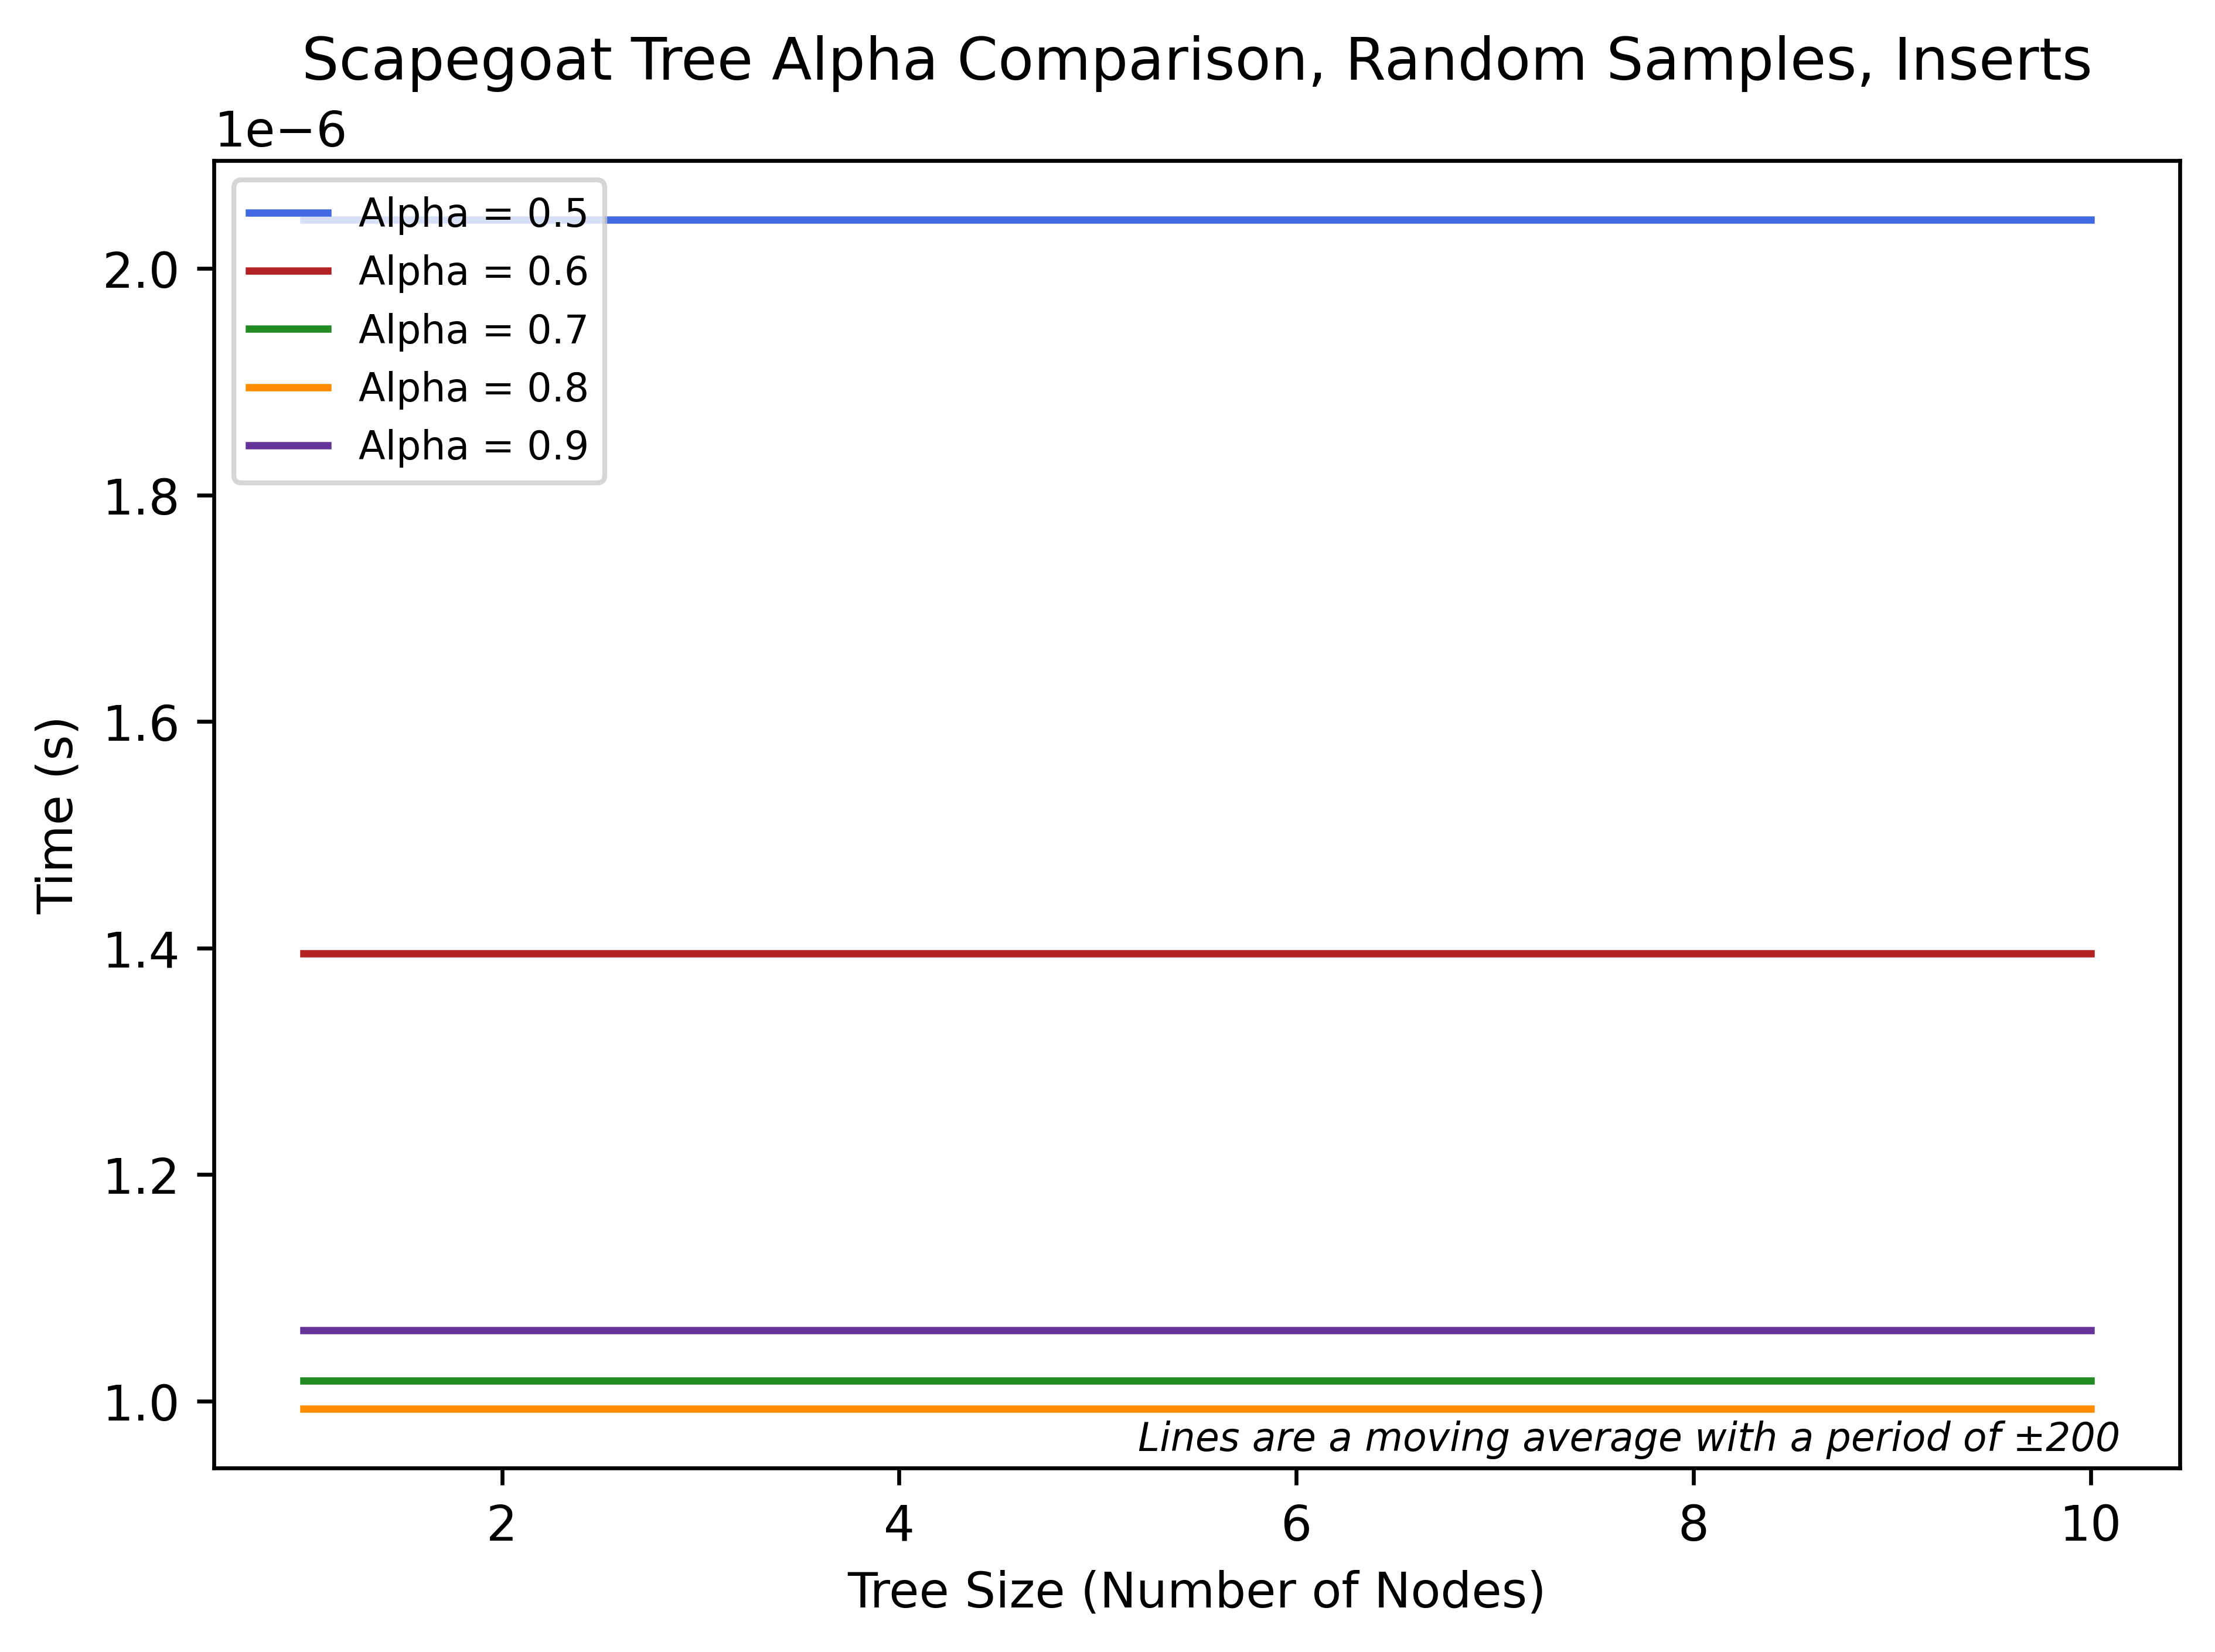

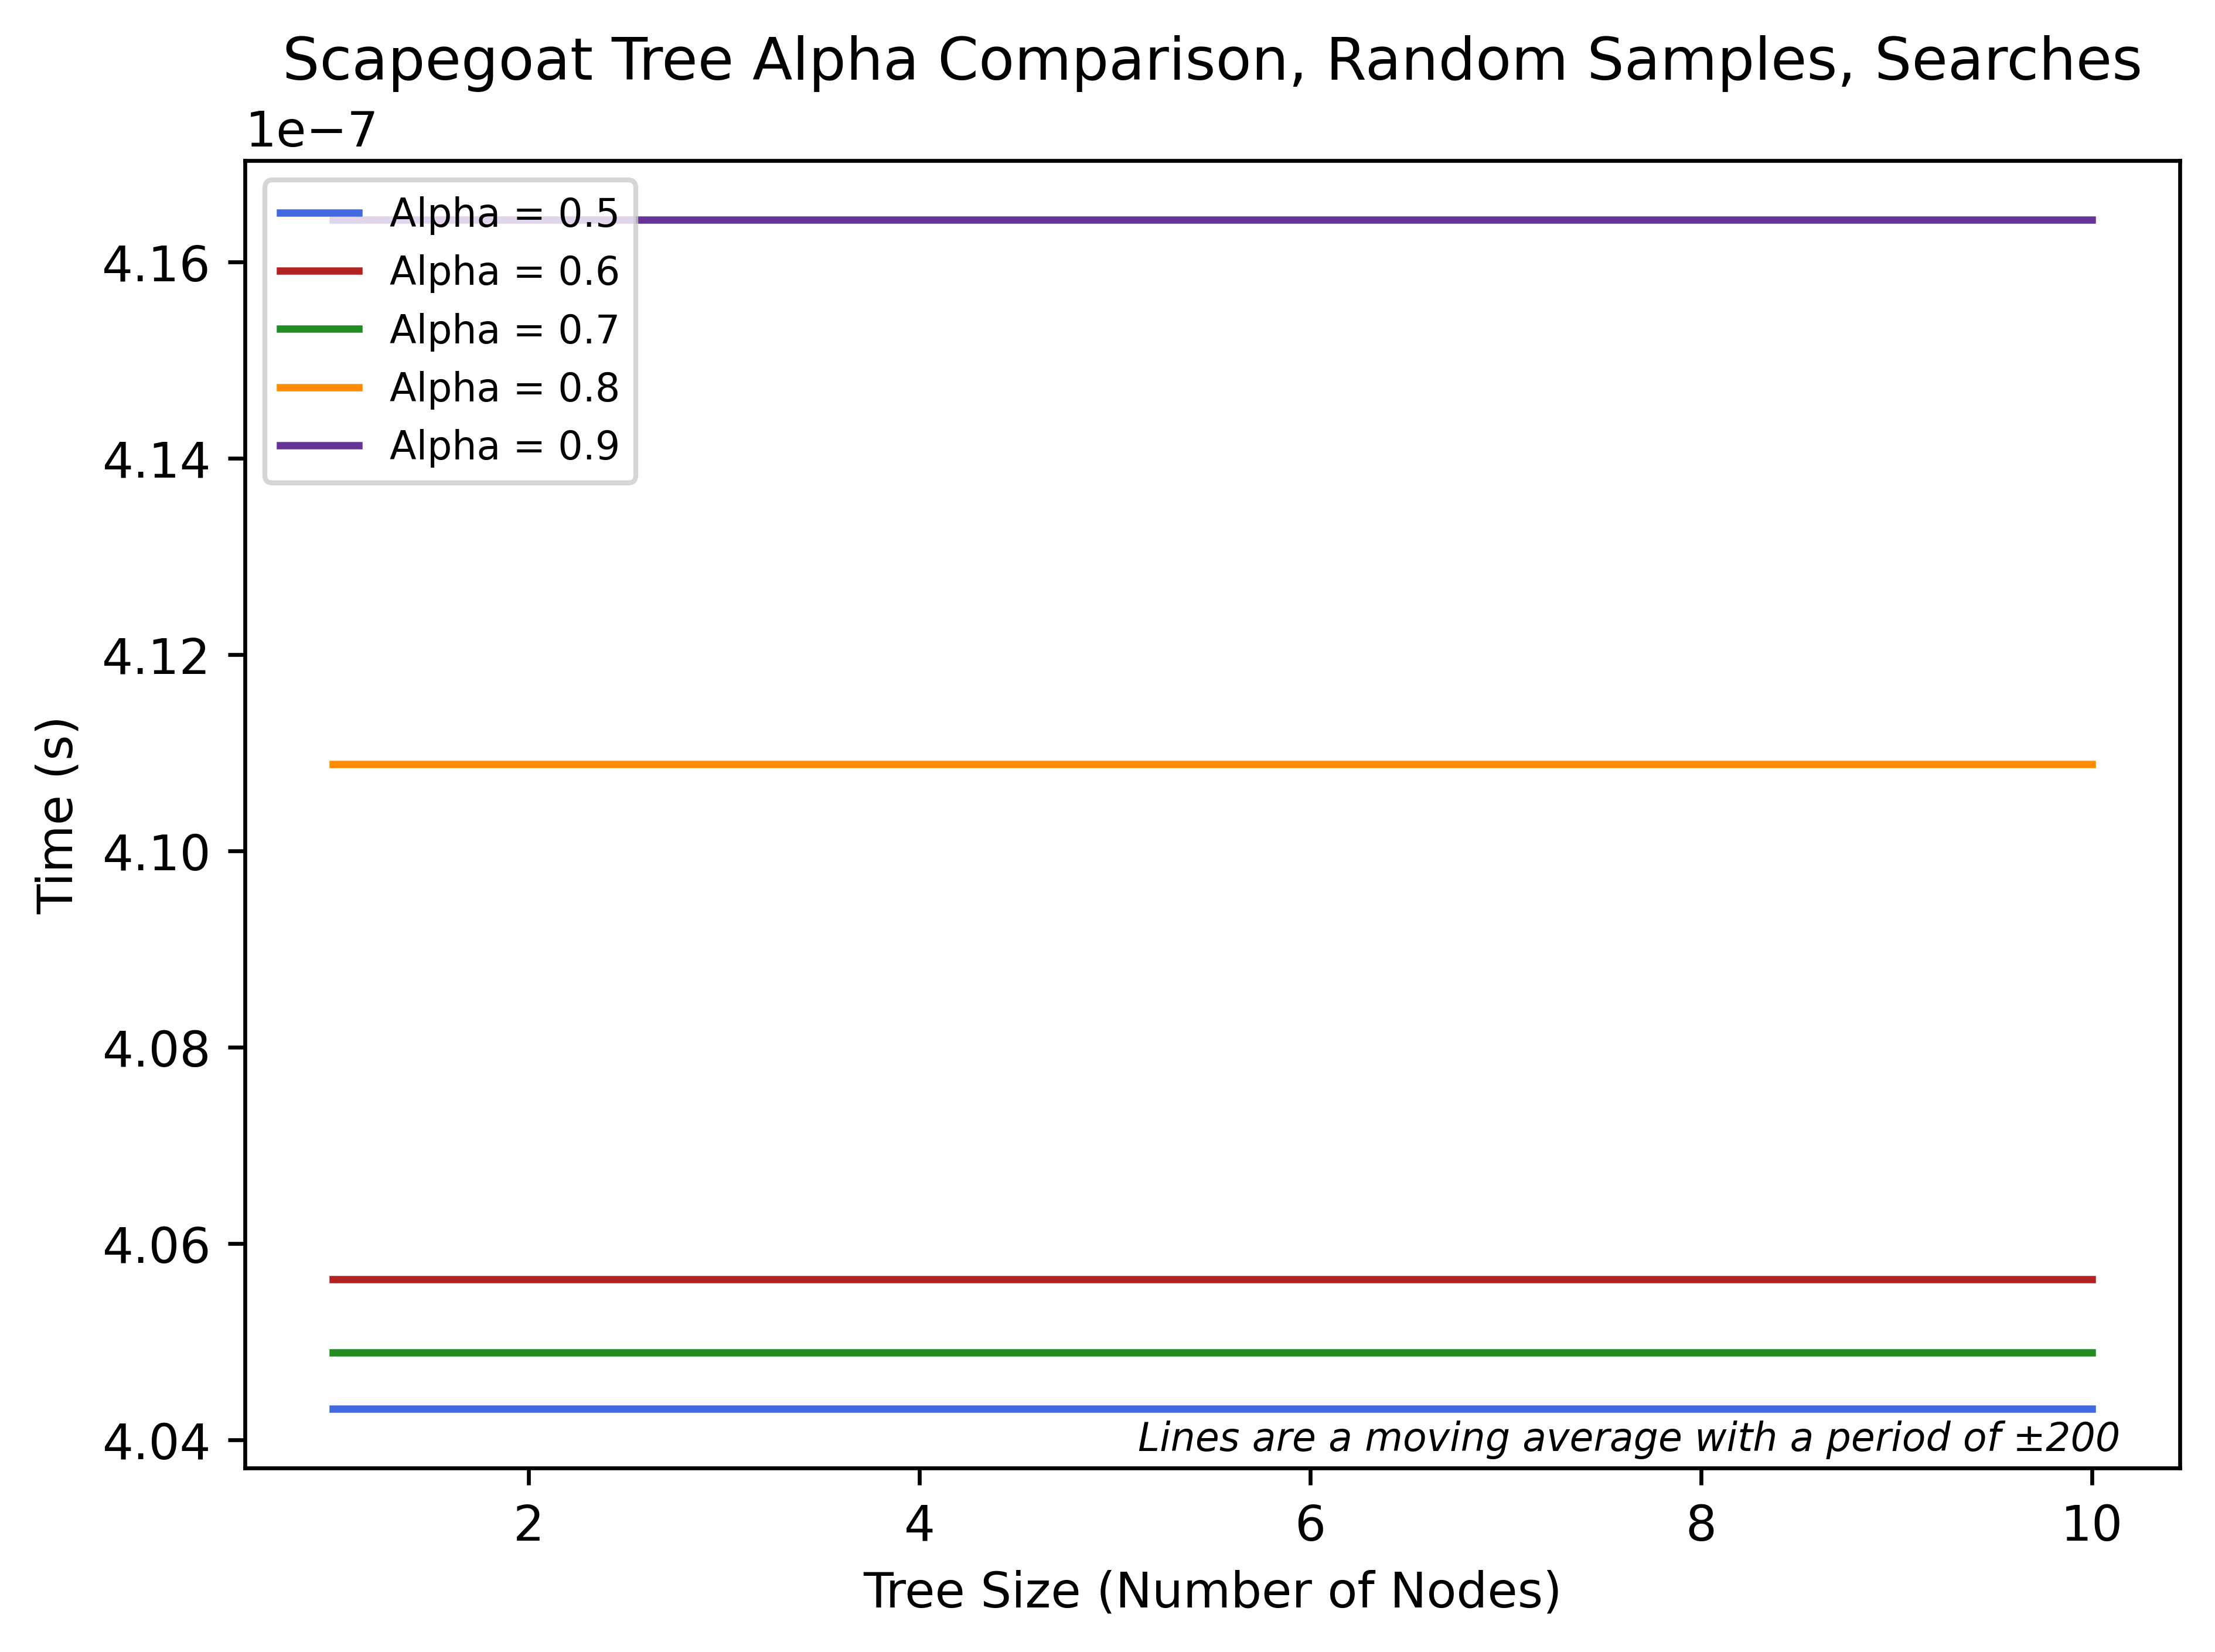

KeyboardInterrupt: 

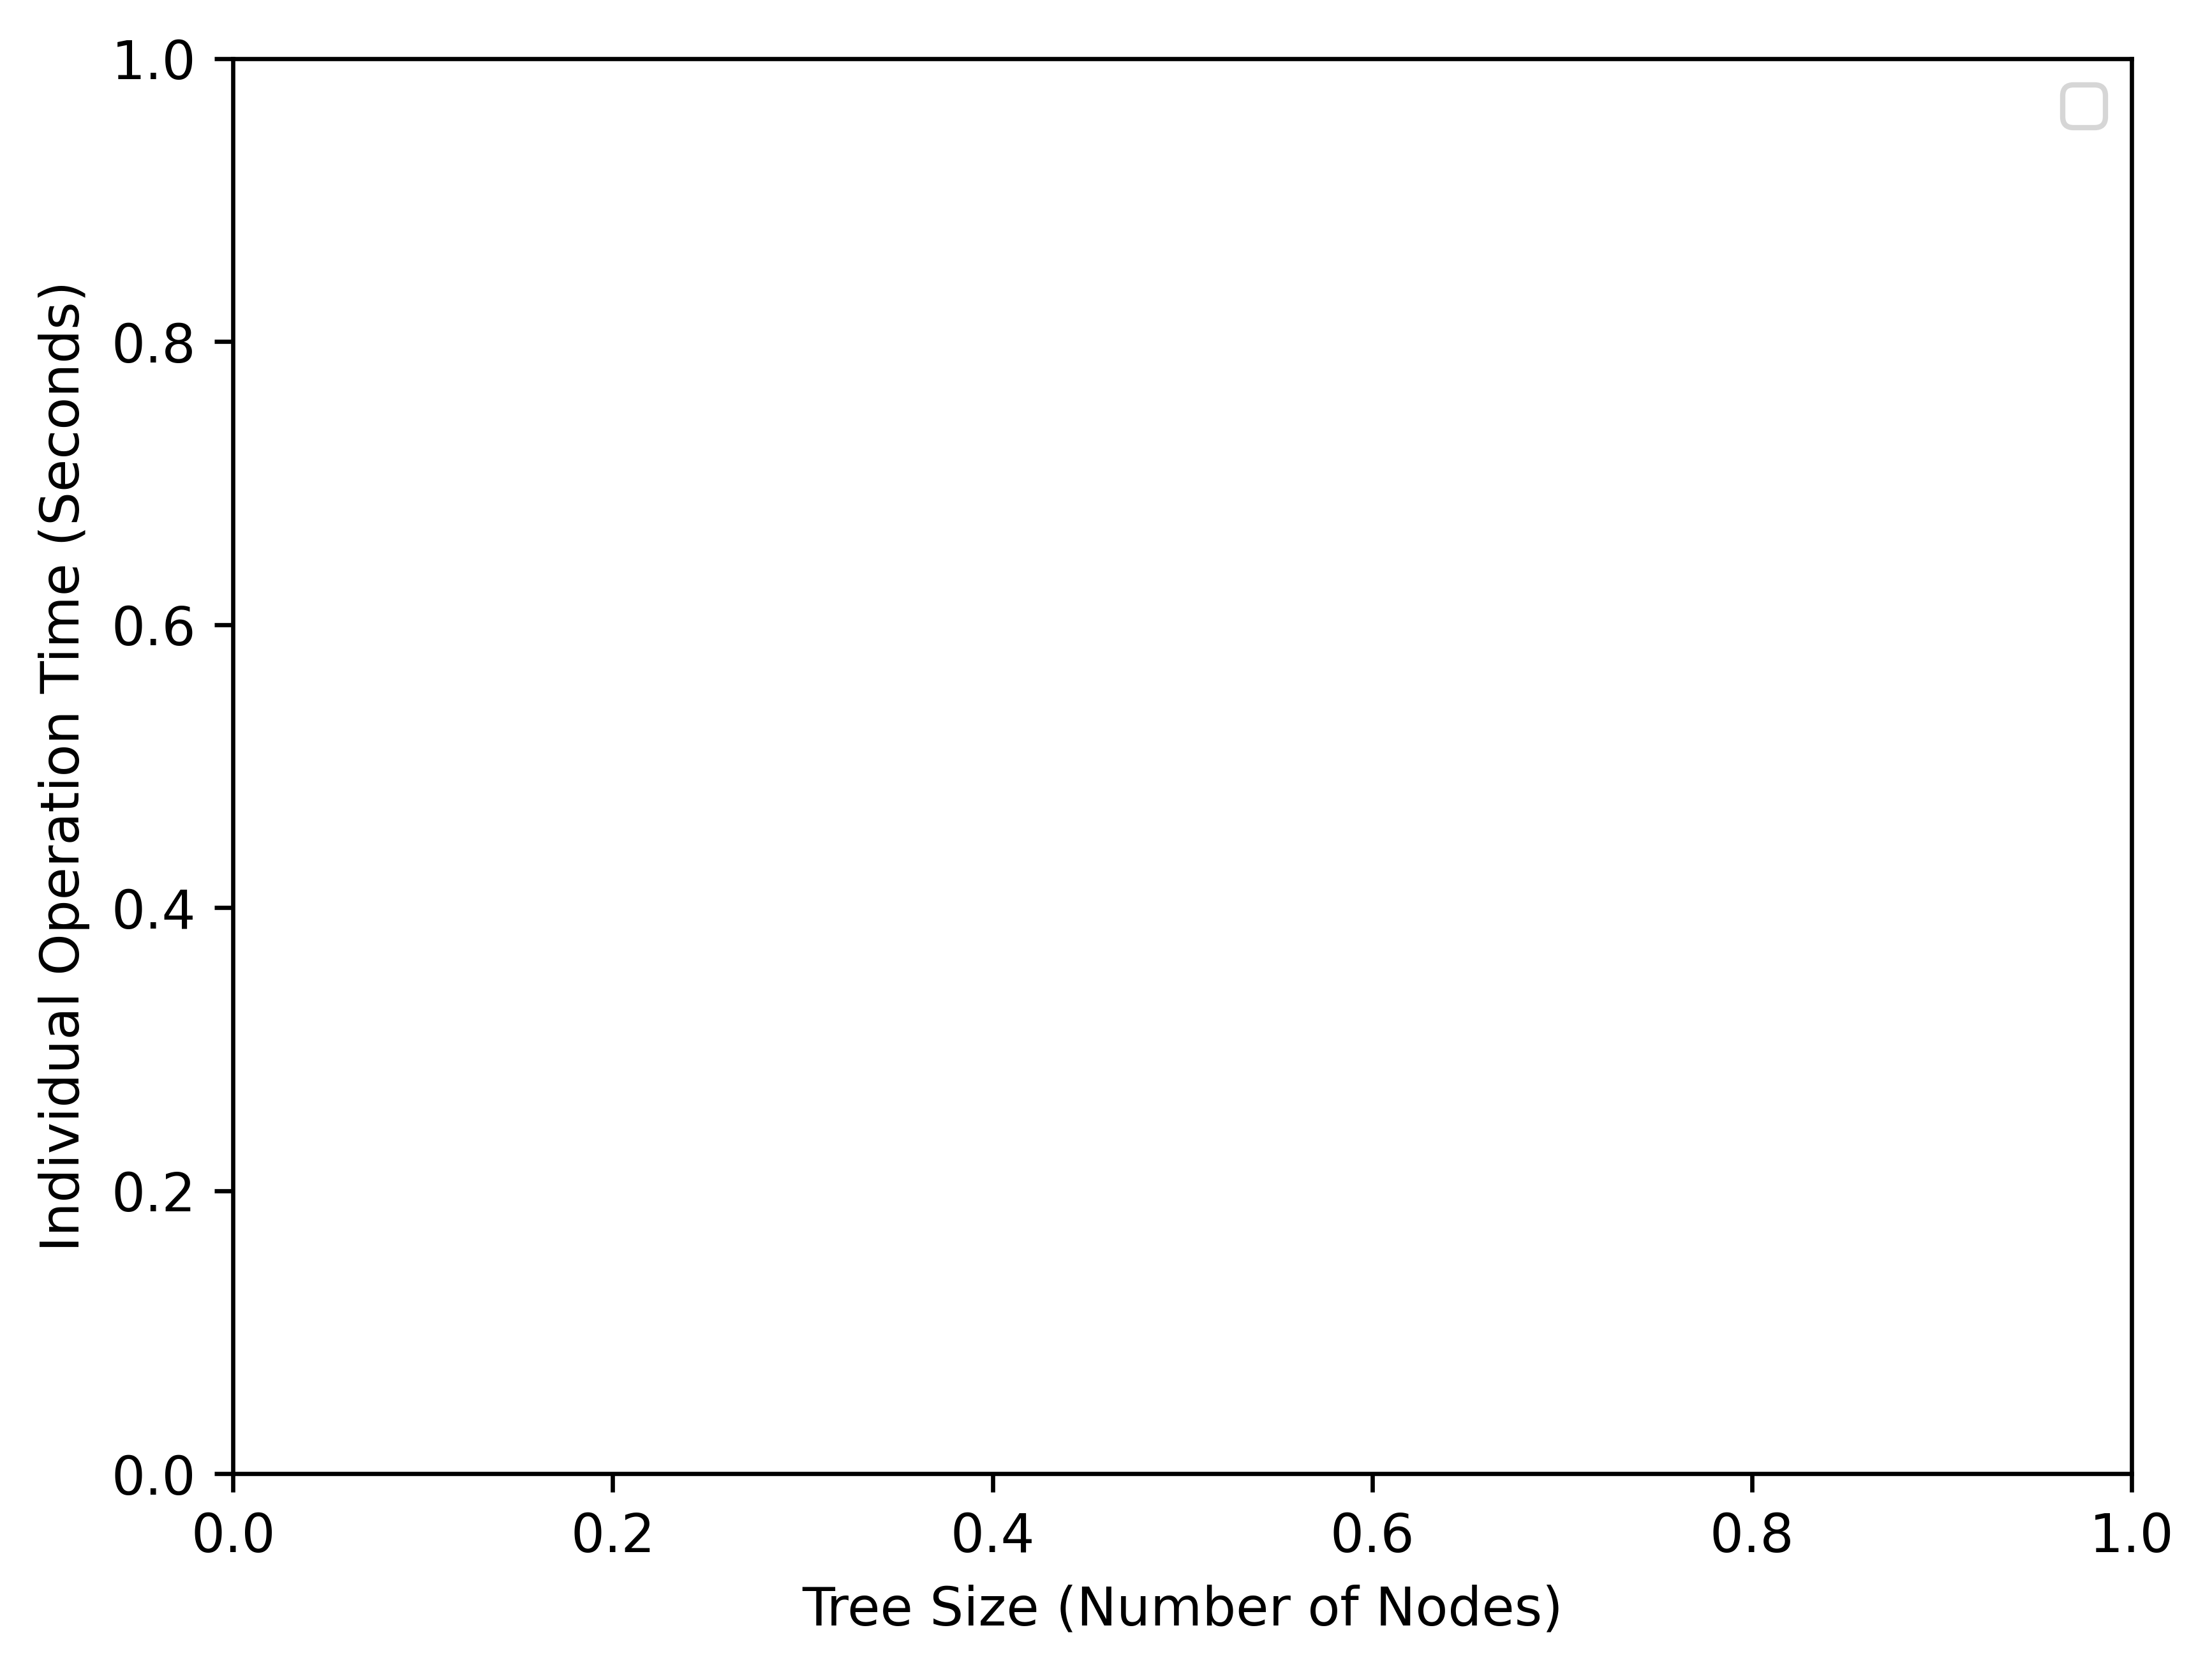

In [ ]:
# ADD YOUR TEST CODE HERE 
sampleSizeExponent = 4 # Change this value to adjust sample size (base^exponent)
outputDir = "../UNI/Plots/"

# Scapegoat Experiments
Scapegoat = ExperimentalFramework(sampleSizeExponent, ScapegoatTree)
Scapegoat.scapeGoatComparison(scatter=False, outputDir=outputDir + "mAvg/")
Scapegoat.runAllCases(graphTitle="Scapegoat Tree, ", scatter=False, outputDir=outputDir + "mAvg/")

# BTree Experiments (repeat similar structure)
BTree = ExperimentalFramework(sampleSizeExponent, BTree, bf=50)
BTree.bTreeComparison(scatter=False, outputDir=outputDir + "mAvg/")
BTree.runAllCases(graphTitle="BTree, ", scatter=False, outputDir=outputDir + "mAvg/")

# LLRBBST Experiments (repeat similar structure)
LLRBBST = ExperimentalFramework(sampleSizeExponent, LLRBBST)
LLRBBST.bstComparison(scatter=False, outputDir=outputDir + "mAvg/")
LLRBBST.runAllCases(graphTitle="LLRBBST Tree, ", scatter=False, outputDir=outputDir + "mAvg/")

LLRBBST.bstComparison(scatter=False, io=True, outputDir=outputDir + "IO/")

